# Investment Strategy for Teclov

### *Problem 1:* Cleaning the Data
***
- Number of unique companies in rounds2 = $66,370$  
- Number of unique companies in companies = $66,368$
- In the companies data frame, $permalink$ column can be used as the unique key for each company.
- There are 7 companies in rounds2 file which are not in companies file. These companies are 
magnet-tech,
zengame,
tipcat-interactive,
weiche-tech,
huizuche-com,
e-cã,
energystone-games
- The master_frame has $114942$ rows





## Code

In [1]:
#system specific
import os
import sys
assert sys.version_info >= (3,5)

#import the needed libraries
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

#consistent size plot
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['axes.labelsize']= 12

#enable viewing of all the columns in a df
pd.options.display.max_columns = None

## Load the data
Pandas encoding reference https://docs.python.org/3/library/codecs.html#standard-encodings

In [2]:
df_companies = pd.read_csv('companies.txt',delimiter='\t',encoding='ISO-8859-2')
df_rounds = pd.read_csv('rounds2.csv',delimiter=',',encoding='ISO-8859-2')

### Explore the companies dataframe

In [3]:
#check the top and end rows
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
df_companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ĂEron,ĂERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ĂAsys-2,Ăasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-TanäąTäąM-H...,Ä°novatiff Reklam ve TanÄątÄąm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [5]:
df_companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [6]:
#check the info
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


The name column has just 1 null value. There are many null values in the other columns. permalink and status are the only columns with no null values. 

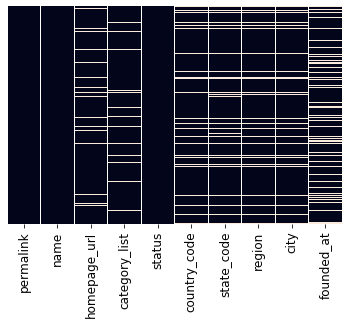

In [7]:
#visualize the null values in the dataset
sns.heatmap(df_companies.isna(),yticklabels=False,cbar=False)
plt.show()

In [8]:
#extract the row where the name column is null
df_companies[df_companies['name'].isna()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/Organization/Tell-It-In,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


The name is missing and at the same time we see that the status column indicates "closed". One way to handle this null value is to simply impute the name as in the permalink column 

In [9]:
df_companies.iloc[56916]['name']= 'Tell It In'

In [10]:
df_companies.iloc[56916]

permalink        /Organization/Tell-It-In
name                           Tell It In
homepage_url        http://tellitin10.com
category_list                    Startups
status                             closed
country_code                          USA
state_code                             OR
region                   Portland, Oregon
city                             Portland
founded_at                     01-10-2011
Name: 56916, dtype: object

In [11]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66368 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


### Finding the unique number of companies in the companies dataframe

In [12]:
#create a copy of the original dataframe
companies = df_companies.copy()

In [13]:
#check the number of times the companies occur in the dataset
companies['name'].value_counts().sort_values(ascending=False)

Blink                4
Spire                4
Peach                4
Roost                4
Karma                4
                    ..
Move Loot            1
Intelligent Group    1
Wireless Tech        1
TransitionWorks      1
Whitfield Solar      1
Name: name, Length: 66103, dtype: int64

In [14]:
companies[companies['name']=='Blink']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
7449,/Organization/Blink,Blink,http://www.blink.la,Content|Journalism|Location Based Services|Med...,operating,USA,NY,New York City,New York,01-01-2013
7450,/Organization/Blink-4,Blink,http://www.blinnnk.com/,Software,operating,JPN,18,JPN - Other,China,01-01-2014
7451,/Organization/Blink-7,Blink,http://blinkforhome.com,Electronics,operating,USA,MA,Boston,Boston,NaN
7452,/Organization/Blink-9,Blink,http://www.flyblink.com/,Location Based Services|Service Providers,operating,GBR,N7,Camberley,Camberley,NaN


The same company name 'Blink' has 4 occurrences and looking at the raw data these are all different companies. The url is different, the category list is different and the home page is also very different. The name column would not be a suitable feature to decide the unique number of companies

In [15]:
#lets check one more repeated name company called Karma
companies[companies['name']=='Karma']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
30215,/Organization/Karma,Karma,http://getkarma.com,Mobile,acquired,USA,CA,SF Bay Area,San Francisco,01-01-2011
30216,/Organization/Karma-2,Karma,http://yourkarma.com,Internet Service Providers|Mobile|Telecommunic...,operating,USA,NY,New York City,New York,18-01-2012
30217,/Organization/Karma-5,Karma,https://karma.wiki/,Media|Social Network Media|Technology,operating,NaN,NaN,NaN,NaN,NaN
30219,/Organization/Karma-Labs,Karma,http://havekarma.com,Collaborative Consumption|Reputation,operating,USA,CA,Los Angeles,Los Angeles,01-04-2013


The permalink has a different code for each of these companies with the same name. Hence it is better to clean up the permalink feature to retrieve the unique companies.

In [16]:
#first conver the string to lowercase
companies['permalink'] = companies['permalink'].str.lower()

In [17]:
#replace the prefix /organization/ and /organization/- from the strings
companies['permalink'] = companies['permalink'].str.replace('/organization/-','')
companies['permalink'] = companies['permalink'].str.replace('/organization/','')

In [18]:
companies['permalink'][:7]

0                     fame
1                  qounter
2     the-one-of-them-inc-
3                  0-6-com
4         004-technologies
5       01games-technology
6    0ndine-biomedical-inc
Name: permalink, dtype: object

In [19]:
#view the last 7 values of permalink
companies['permalink'][-7:]

66361                                       zytoprotec
66362                                            zzish
66363             zznode-science-and-technology-co-ltd
66364                                      zzzzapp-com
66365                                           ăeron
66366                                         ăasys-2
66367    ä°novatiff-reklam-ve-tanäątäąm-hizmetleri-tic
Name: permalink, dtype: object

In [20]:
#check for any duplicates
duplicate = companies.duplicated(subset='permalink',keep='first').value_counts()

In [21]:
#check the number of duplicates True values if any
duplicate

False    66368
dtype: int64

There are no duplicates in the permalink. The total number of unique companies in the companies file is 66,368 which is same as the number of rows in the companies dataset.

In [22]:
#for interest, lets now check the rows for one of the repeated company's name
companies[companies['name']=='Karma']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
30215,karma,Karma,http://getkarma.com,Mobile,acquired,USA,CA,SF Bay Area,San Francisco,01-01-2011
30216,karma-2,Karma,http://yourkarma.com,Internet Service Providers|Mobile|Telecommunic...,operating,USA,NY,New York City,New York,18-01-2012
30217,karma-5,Karma,https://karma.wiki/,Media|Social Network Media|Technology,operating,NaN,NaN,NaN,NaN,NaN
30219,karma-labs,Karma,http://havekarma.com,Collaborative Consumption|Reputation,operating,USA,CA,Los Angeles,Los Angeles,01-04-2013


### Explore the rounds dataframe

In [23]:
#top few rows
df_rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [24]:
#last few rows
df_rounds.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ăeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ĂASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanäątäąm-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [25]:
#check the info
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


Except for funding_round_code and raised_amount_usd, rest of the features do not have null values. 
The raised_amount_usd is of type float64 while others are in the string format. 
- company_permalink is the only feature from where we can determine the unique company names.

In [26]:
df_rounds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
raised_amount_usd,94959.0,1.042687e+07,1.148212e+08,0.0,322500.0,1680511.0,7000000.0,2.127194e+10


### Finding the unique number of companies in the rounds dataframe

In [27]:
#create a copy of the original dataframe
rounds = df_rounds.copy()

In [28]:
#check the number of unique values in company_permalink
len(rounds['company_permalink'].unique())

90247

As this is less than the total number of rows and that there are no null values in this feature, it means there are duplicates in company_permalink

In [29]:
rounds['company_permalink'].value_counts().sort_values(ascending=False)

/ORGANIZATION/SOLARFLARE             10
/ORGANIZATION/QUELLAN                 9
/organization/semprius                9
/organization/solarflare              9
/organization/exagen-diagnostics      9
                                     ..
/ORGANIZATION/BARDAKOVKA              1
/organization/credit-aid-software     1
/ORGANIZATION/PLAYERPRO               1
/ORGANIZATION/PHYFLEX-NETWORKS        1
/ORGANIZATION/IPICO                   1
Name: company_permalink, Length: 90247, dtype: int64

So we see there are companies which are repeated in company_permalink

In [30]:
#apply the cleaning steps as in companies dataframe and check for duplicates

#first conver the string to lowercase
rounds['company_permalink'] = rounds['company_permalink'].str.lower()

#replace the prefix /organization/ and /organization/- from the strings
rounds['company_permalink'] = rounds['company_permalink'].str.replace('/organization/-','')
rounds['company_permalink'] = rounds['company_permalink'].str.replace('/organization/','')

In [31]:
rounds['company_permalink'][:7]

0                    fame
1                 qounter
2                 qounter
3    the-one-of-them-inc-
4                 0-6-com
5        004-technologies
6      01games-technology
Name: company_permalink, dtype: object

In [32]:
rounds['company_permalink'][-7:]

114942                                      zzzzapp-com
114943                                      zzzzapp-com
114944                                      zzzzapp-com
114945                                      zzzzapp-com
114946                                           ăeron
114947                                         ăasys-2
114948    ä°novatiff-reklam-ve-tanäątäąm-hizmetleri-tic
Name: company_permalink, dtype: object

In [33]:
duplicate = rounds.duplicated(subset='company_permalink',keep='first').value_counts()

In [34]:
duplicate

False    66370
True     48579
dtype: int64

In [35]:
#create a copy of the cleaned dataset before removing the duplicates
rounds2 = rounds.copy()

In [36]:
#list few rows based on duplicated values in company_permalink
rounds[rounds.duplicated(subset='company_permalink',keep='first')][:5]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
8,0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0


In [37]:
#drop the rows where the company_permalink has duplicate values leaving out the first occurrence
rounds.drop_duplicates(subset='company_permalink',inplace=True,keep='first')

In [38]:
#check the info .. 
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66370 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        66370 non-null  object 
 1   funding_round_permalink  66370 non-null  object 
 2   funding_round_type       66370 non-null  object 
 3   funding_round_code       14139 non-null  object 
 4   funded_at                66370 non-null  object 
 5   raised_amount_usd        51820 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.5+ MB


In [39]:
#check if still duplicate values in company_permalink
rounds.duplicated(subset='company_permalink',keep='first').value_counts()

False    66370
dtype: int64

Now, there are no duplicate values in company_permalink in rounds2 dataframe. 

In [40]:
#number of unique companies
len(rounds['company_permalink'].unique())

66370

In [41]:
#check one of the repeating company names -- > 0xdata
rounds[rounds['company_permalink']=='0xdata']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
9,0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


### Companies in rounds2 file but not in companies file

In [42]:
set1 = set(companies['permalink'])
set2 = set(rounds['company_permalink'])

In [43]:
#check the length of intersection of the two sets
len(set2.intersection(set1))

66363

In [44]:
#test companies which are either in set1 or in set2 but not in both
len(set2.symmetric_difference(set1))

12

In [45]:
#companies which are in rounds2 but not in companies
set_d = set2 - set1

In [46]:
#print the companies which are in rounds2 but not in compannies
for i in range(len(set_d)):
    print(list(set_d)[i])

energystone-games-çľçłć¸¸ć
tipcat-interactive-ć˛č˙äżąćżç§ć
e-căbica
huizuche-com-ć ç§˙č˝ś
weiche-tech-ĺč˝śç§ć
magnet-tech-çłçłç§ć
zengame-çść¸¸ç§ć


### Merge the companies and the rounds2 dataframe and retain 

In [47]:
#check the saved copy of the rounds file post cleaning & before duplicate removal
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [48]:
rounds2.shape

(114949, 6)

In [49]:
#merge the two dataframes so that all columns in companies are in rounds2
master_frame = companies.merge(rounds2,left_on='permalink',right_on='company_permalink',
                suffixes=('_companies','_rounds2'))

In [50]:
master_frame.shape

(114942, 16)

In [51]:
master_frame.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


In [52]:
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [53]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114942 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  company_permalink        114942 non-null  object 
 11  funding_round_permalink  114942 non-null  object 
 12  funding_round_type       114942 non-null  object 
 13  funding_round_code       31139 non-null   object 
 14  fund

In [54]:
master_frame.to_csv('merged.csv',index=False)